CLASSIFICATION

Importing fundamental libraries used in whole process.

In [0]:
import numpy as np
import pandas as pd

Load the dataset from google drive, convert them to dataframe.

In [0]:
import requests
from io import StringIO

pd.set_option('mode.chained_assignment', None)
url = requests.get('https://bit.ly/used_cars_dataset')
csv_raw = StringIO(url.text)
df = pd.read_csv(csv_raw)

DATA EXPLORATION

Count number of records.

In [0]:
len(df.index)

20001

DEFINING DATATYPES

Drop unrelated features and bias.

In [0]:
# Mostly unrelated features in the model.
df = df.drop(columns=['Unnamed: 0','id','url','region_url','image_url',
                      'county','description','vin','county','lat','long','condition',
                      'title_status','paint_color','size','type','year'])

In [0]:
df.head()

,region,price,manufacturer,model,cylinders,fuel,odometer,transmission,drive,state
0,salt lake city,17899,volkswagen,golf r,4 cylinders,gas,63500.0,manual,4wd,ut
1,salt lake city,0,ford,f-150,NaN,gas,10.0,automatic,4wd,ut
2,salt lake city,46463,gmc,sierra 1500,NaN,gas,7554.0,automatic,4wd,ut
3,salt lake city,0,ford,f-150,NaN,gas,10.0,automatic,4wd,ut
4,salt lake city,49999,ford,f-450,NaN,diesel,70150.0,automatic,4wd,ut


Define the features and label

In [0]:
features = df.loc[:, df.columns != 'state']
label = df['state']

Define whether the features are categorical or numerical.

In [0]:
nums = ['price','odometer']
cates = features.columns.drop(nums) 

Handle missing values.

In [0]:
# Count the numerical columns if there are missing values.
features[nums].count()

price       20001
odometer    17612
dtype: int64

In [0]:
# Count the categorical columns if there are missing values.
features[cates].count()

region          20001
manufacturer    19296
model           19736
cylinders       12916
fuel            19928
transmission    19811
drive           15359
dtype: int64

In [0]:
# Handle numerical columns.
# For price, there is an exception so we handle 0's as null values.
features.loc[features.price == 0,'price'] = np.nan

# Using mean method, handle the missing values.
for numer in nums:
     features[numer] = features[numer].fillna(features[numer].mean())
features[nums].head()

In [0]:
# Handle categorical columns.
# Using mode method, handle the missing values.
for cate in cates:
     features[cate] = features[cate].fillna(features[cate].mode().values[0])

features[cates].head()

,region,manufacturer,model,cylinders,fuel,transmission,drive
0,salt lake city,volkswagen,golf r,4 cylinders,gas,manual,4wd
1,salt lake city,ford,f-150,6 cylinders,gas,automatic,4wd
2,salt lake city,gmc,sierra 1500,6 cylinders,gas,automatic,4wd
3,salt lake city,ford,f-150,6 cylinders,gas,automatic,4wd
4,salt lake city,ford,f-450,6 cylinders,diesel,automatic,4wd


BINNING

Do binning by categorizing the numerical features.

In [0]:
# # Handle numerical values by binning.
# # Binning on price,0 means low price and 1 means high price.
price_mean = features.price.mean()
features.loc[features.price <= price_mean,'price'] = 0
features.loc[features.price > price_mean,'price'] = 1

# # Binning on odometer, 0 is a near distance and 1 is a far distance.
odometer_mean = features.odometer.mean()
features.loc[features.odometer <= odometer_mean,'odometer'] = 0
features.loc[features.odometer > odometer_mean,'odometer'] = 1

features.head()

,region,price,manufacturer,model,cylinders,fuel,odometer,transmission,drive
0,salt lake city,0.0,volkswagen,golf r,4 cylinders,gas,0.0,manual,4wd
1,salt lake city,0.0,ford,f-150,6 cylinders,gas,0.0,automatic,4wd
2,salt lake city,0.0,gmc,sierra 1500,6 cylinders,gas,0.0,automatic,4wd
3,salt lake city,0.0,ford,f-150,6 cylinders,gas,0.0,automatic,4wd
4,salt lake city,0.0,ford,f-450,6 cylinders,diesel,0.0,automatic,4wd


PREPROCESSING

Encode the data using label encoder.

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_decode = df_decode[columns].apply(le.fit_transform)
df = df_decode
df

,region,price,manufacturer,model,cylinders,fuel,odometer,transmission,drive,state
0,12,0,38,2197,3,2,0,1,0,0
1,12,0,12,1764,5,2,0,0,0,0
2,12,0,13,3285,5,2,0,0,0,0
3,12,0,12,1764,5,2,0,0,0,0
4,12,0,12,1843,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
19996,5,0,32,1379,5,0,0,0,0,3
19997,5,0,29,3242,3,2,0,0,1,3
19998,5,0,19,2224,5,2,0,0,0,3
19999,5,0,37,1276,3,2,0,0,1,3


DATA CORRELATION

View the data correlation using heatmap.

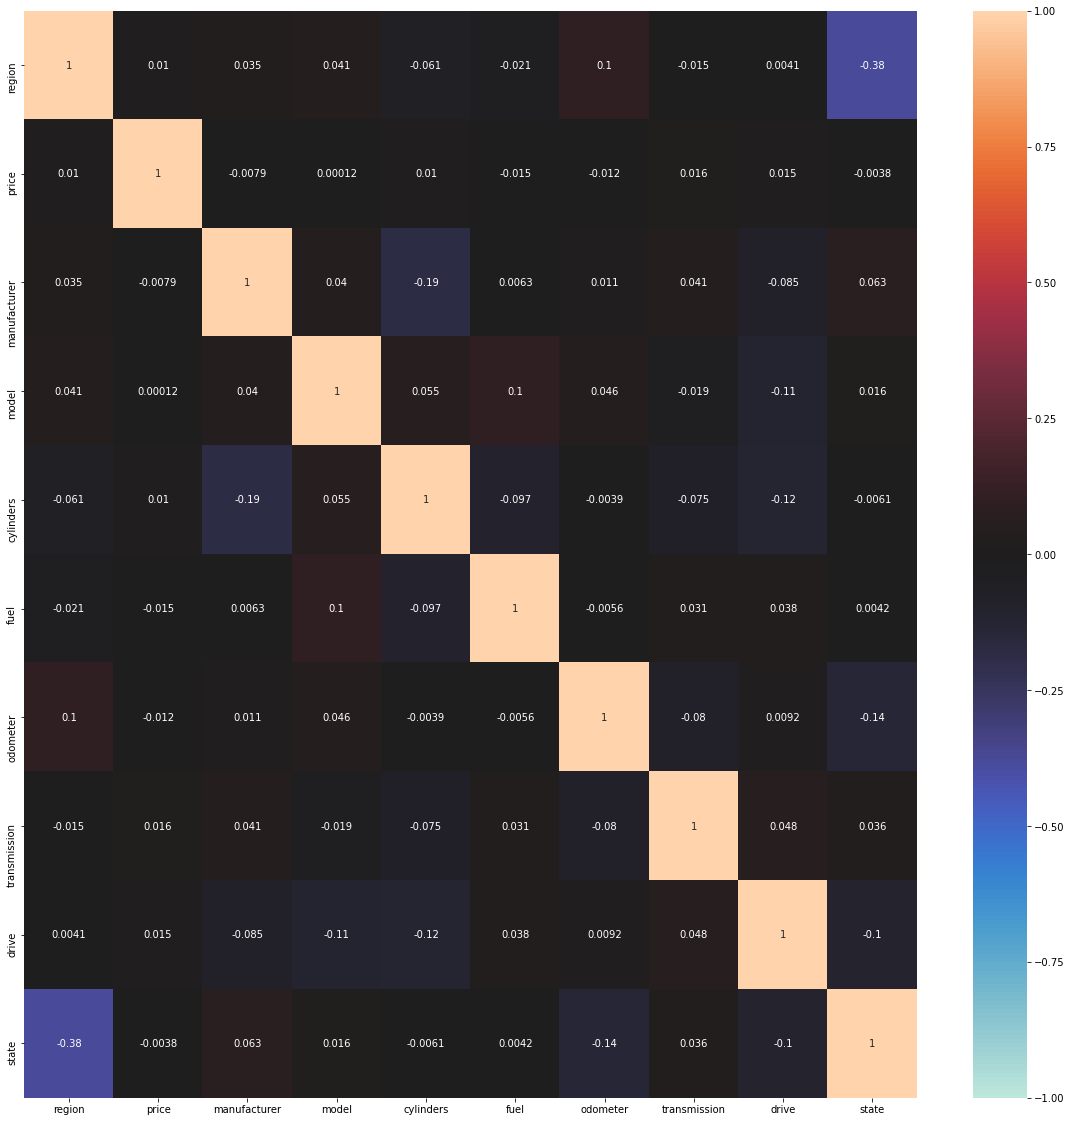

In [0]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)

SPLIT THE DATASET

Split the dataset to train and test data.

In [0]:
from sklearn.model_selection import train_test_split

features = df.loc[:, df.columns != 'state']
label = df['state']

x_train, x_test, y_train, y_test = train_test_split(features,label,
                                                    train_size= 0.7,
                                                    test_size = 0.3, 
                                                    random_state = 2)


MODEL 1 : USING K-NEIGHBORS CLASSIFIER

In [0]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(x_train, y_train)
target_pred = classifier.predict(x_test)
target_pred

array([2, 1, 1, ..., 3, 2, 1])

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy= accuracy_score(y_test, target_pred)
accuracy

0.8585235794034327

MODEL 2 : USING NAIVE BAYES

In [0]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracyGauss = accuracy_score(y_test,y_pred)
accuracyGauss

0.9091818030328278